<b>Medical Cost Personal Datasets</b>

<b>Site</b>: <i>https://www.kaggle.com/datasets/mirichoi0218/insurance</i>
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

# Import libraries:

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from yellowbrick.regressor import ResidualsPlot 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

# Load file:

In [142]:
base = pd.read_csv('insurance.csv')

# Read file:

- <i> <b>Top</b> five </i>

In [143]:
base.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- <i> <b>Bottom</b> five </i>

In [144]:
base.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# EDA:

- <i>Read number columns</i>

In [145]:
base.shape

(1338, 7)

- <i>Read number duplicated</i>

In [146]:
print(f"Read number duplicated: {base.duplicated().sum()}")

Read number duplicated: 1


- <i>Remove duplicated</i>

In [147]:
base = base.drop_duplicates()
print(f"Read number duplicated: {base.duplicated().sum()}")

Read number duplicated: 0


- <i>In the line bellow, We exploration <b>type</b> columns</i>

In [148]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


- <i>Checking for <b>empty</b> lines:</i>

In [149]:
base.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Resume stats:

In [118]:
base.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- <i>Overview</i>

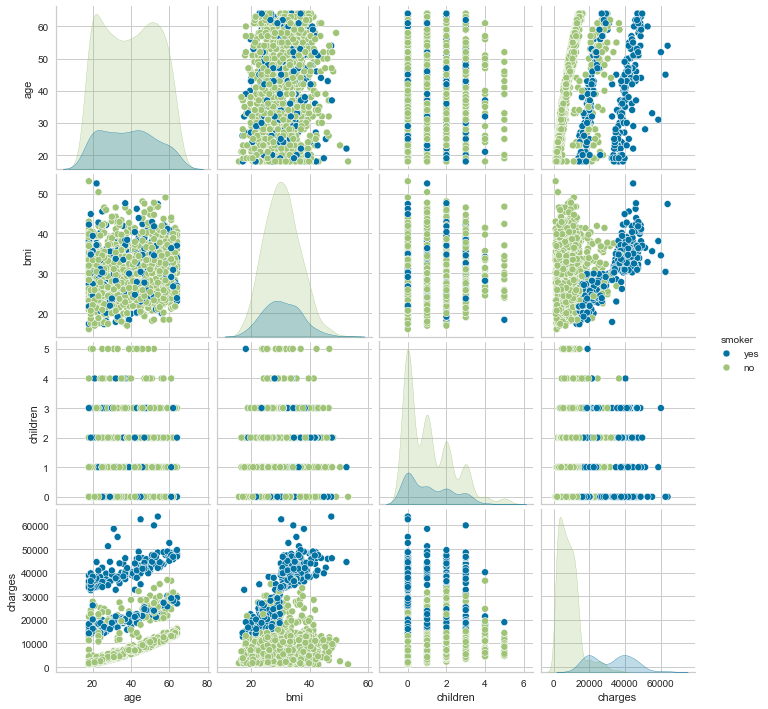

In [119]:
sns.pairplot(base, hue='smoker')
plt.show()

* <i><b>Age</b> Distribution:</i>

[Text(0.5, 1.0, 'Age')]

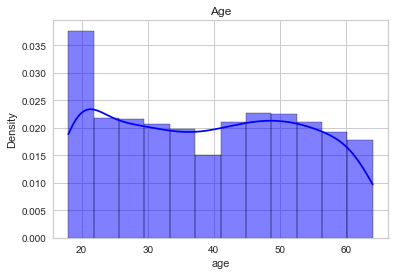

In [151]:
sns.histplot(data = base, x = "age", kde=True, stat="density",color='blue').set(title='Age')

- <i><b>Sex</b> Distribution:</i>

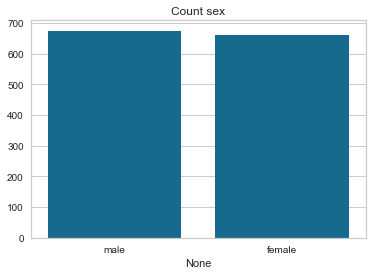

In [121]:
# Assuming 'base' is your DataFrame and you've already calculated contagem_por_categoria
sex_count = base['sex'].value_counts()

# Plotting
sns.barplot(x=sex_count.index, y=sex_count.values).set(title='Count sex')
plt.show()

- <i>Body Mass Index <b>(BMI)</b>:</i>

[Text(0.5, 1.0, 'BMI')]

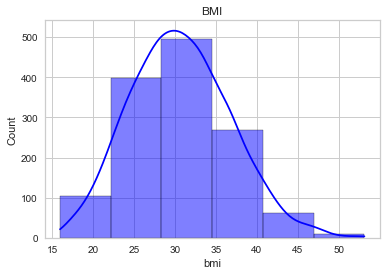

In [122]:
sns.histplot(base['bmi'], kde=True, bins=6, color='blue').set(title='BMI')

- <i>Number of <b>children</b>:</i>

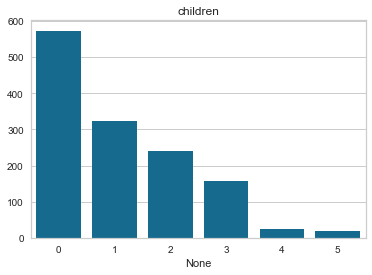

In [155]:
# Assuming 'base' is your DataFrame and you've already calculated contagem_por_categoria
ch_count = base['children'].value_counts()

# Plotting
sns.barplot(x=ch_count.index, y=ch_count.values).set(title='children')
plt.show()

- <i>Distribution of <b>smokers</b>:</i>

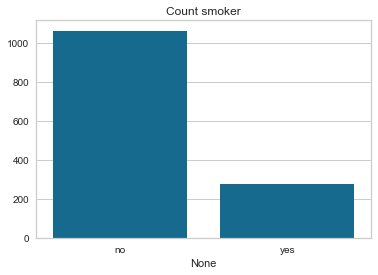

In [156]:
# Assuming 'base' is your DataFrame and you've already calculated contagem_por_categoria
sm_count = base['smoker'].value_counts()

# Plotting
sns.barplot(x=sm_count.index, y=sm_count.values).set(title='Count smoker')
plt.show()


- <i>Distribution of <b>regions</b>:</i>

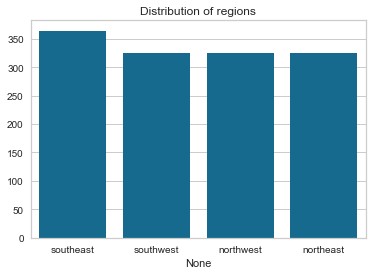

In [185]:
# Assuming 'base' is your DataFrame and you've already calculated contagem_por_categoria
rg_count = base['region'].value_counts()

# Plotting
sns.barplot(x=rg_count.index, y=rg_count.values).set(title='Distribution of regions')
plt.show()

- Price x Age by number of smokers:

[Text(0.5, 1.0, 'Custos')]

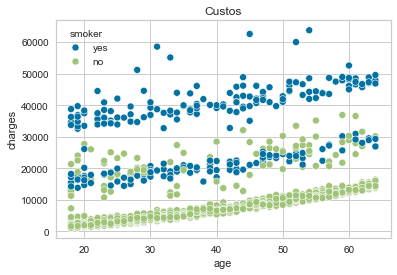

In [158]:
#sns.histplot(base['charges'], kde=True, bins=10, color='blue').set(title='Custos')
sns.scatterplot(base, x = 'age',y = 'charges', hue = 'smoker').set(title='Custos')

- Price x BMI by number of smokers:

[Text(0.5, 1.0, 'Custos')]

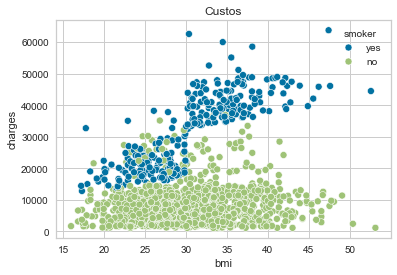

In [160]:
#sns.histplot(base['charges'], kde=True, bins=10, color='blue').set(title='Custos')
sns.scatterplot(base, x = 'bmi',y = 'charges', hue = 'smoker').set(title='Custos')

- Charges per smoker

<Axes: xlabel='smoker', ylabel='charges'>

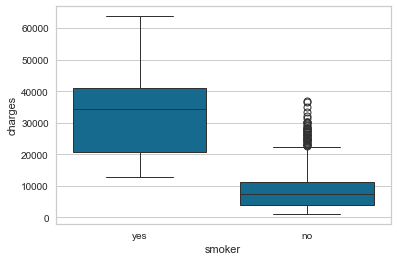

In [128]:
sns.boxplot(base, x = 'smoker', y = 'charges')

# Transform Data:

In [161]:
base.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- <i>Convert columns into dummy variables with a <b>specified prefix for each column</b> and concatenate them into the original DataFrame:</i>

In [187]:
df = pd.get_dummies(base, columns=['region', 'sex', 'smoker'], prefix=['region', 'sex', 'smoker'], dtype=int)

- Verify the updated DataFrame columns

In [188]:
print(f"Updated columns: {df.columns}")

Updated columns: Index(['age', 'bmi', 'children', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes'],
      dtype='object')


In [189]:
df.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0


<Axes: >

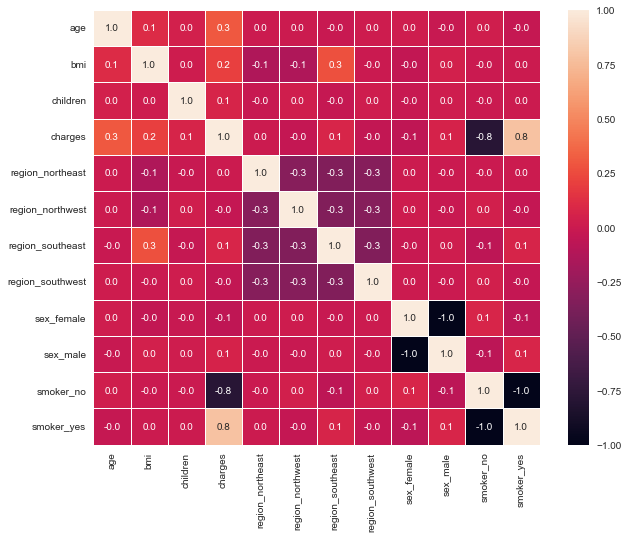

In [190]:
correlation = df.corr()
# Ajustar o tamanho da figura
plt.figure(figsize=(10, 8))  # Ajuste a largura e altura conforme necessário

# Criar o heatmap
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)

#plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

- Ao traçar um mapa de correlação, nota-se que as principais correlações são: <b>age, bmi, children, smoker_no, smoker_yes, sex_female, sex_male</b>

- Sendo assim, utilizaremos as variáveis acima para nosso modelo.

# Regressão Linear:

In [201]:
X = df[['age','bmi', 'children', 'smoker_no', 'smoker_yes','sex_female', 'sex_male']]
y = df[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

print(f"Visualização dos coeficientes: {model.intercept_}")
print(f"Visualização da inclinação da reta: {model.coef_}")
print(f"O Modelo possui um Coeficiente R^2 de: {score:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse,2)}')


Visualização dos coeficientes: [262.11888018]
Visualização da inclinação da reta: [[   249.09521752    305.59649519    537.9633666  -11525.68406221
   11525.68406221     42.51352046    -42.51352046]]
O Modelo possui um Coeficiente R^2 de: 0.80
Mean Squared Error: 35901914.11


- No modelo acima, buscamos o preço com base nas variáveis: <b>age, bmi, children, smoker_no, smoker_yes, sex_female, sex_male</b>

- <b>Bellow, Visualize the actual vs. predicted values after filtering</b>

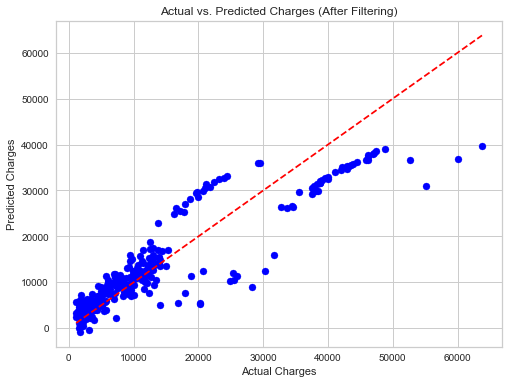

In [193]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (After Filtering)')
plt.grid(True)
plt.show()

- <b>Graph to visualize waste</b>

C:\Users\JUAN.MARTINS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


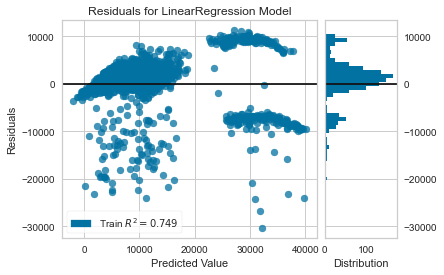

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [191]:
visualizador = ResidualsPlot(model)
visualizador.fit(X, y)
visualizador.poof()

In [168]:
score_teste = model.score(X_test,y_test)
score_teste

0.804621881177266

- <b>Below, Learning Curve Graphs (Learning Curve) View Actual vs. Predicted Values ​​After Filtering</b>

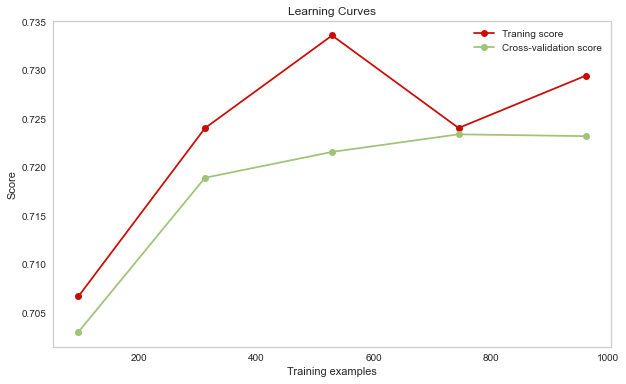

In [195]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Traning score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()